## Libraries

In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
# from sklearn.cluster import MiniBatchKMeans
# from sklearn.cluster import Birch
# from sklearn.cluster import SpectralClustering
# from sklearn.mixture import GaussianMixture

## Data - EL NINO events

In [ ]:
from google.colab import files
uploaded = files.upload()

In [3]:
fn1 = '1.csv'
fn2 = '2.csv'
fn3 = '3.csv'
fn4 = '4.csv'
fn5 = '5.csv'
fn6 = '6.csv'
fn7 = '7.csv'
fn8 = '8.csv'

In [4]:
df1 = pd.read_csv(fn1)
df1 = df1.drop(['avg'],axis=1)

In [5]:
df2 = pd.read_csv(fn2)
df2 = df2.drop(['avg'],axis=1)

In [6]:
df3 = pd.read_csv(fn3)
df3 = df3.drop(['avg'],axis=1)

In [7]:
df4 = pd.read_csv(fn4)
df4 = df4.drop(['avg'],axis=1)

In [8]:
df5 = pd.read_csv(fn5)
df5 = df5.drop(['avg'],axis=1)

In [9]:
df6 = pd.read_csv(fn6)
df6 = df6.drop(['avg'],axis=1)

In [10]:
df7 = pd.read_csv(fn7)
df7 = df7.drop(['avg'],axis=1)

In [11]:
df8 = pd.read_csv(fn8)

In [12]:
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8],axis=1)
# df

In [ ]:
X = df.T
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
1952-1953,0.0,-0.1,0.0,0.2,0.1,0.0,0.1,0.4,0.6,0.6,0.7,0.8,0.8,0.7,0.7,0.8,0.8,0.8
2014-2015,-0.4,-0.4,-0.2,0.1,0.3,0.2,0.1,0.0,0.2,0.4,0.6,0.7,0.6,0.6,0.6,0.8,1.0,1.2
1969-1970,0.7,1.0,1.1,1.1,0.9,0.8,0.6,0.4,0.4,0.5,0.8,0.9,0.8,0.6,0.5,0.3,0.3,0.2
1979-1980,0.0,0.1,0.2,0.3,0.2,0.0,0.0,0.2,0.3,0.5,0.5,0.6,0.6,0.5,0.3,0.4,0.5,0.5
2004-2005,0.3,0.4,0.4,0.4,0.3,0.2,0.2,0.2,0.3,0.5,0.6,0.7,0.7,0.7,0.7,0.6,0.6,0.4
1987-1988,0.7,0.9,1.1,1.2,1.2,1.2,1.1,0.9,1.0,1.2,1.5,1.7,1.6,1.5,1.3,1.1,0.8,0.5
1958-1959,1.8,1.7,1.3,0.9,0.7,0.6,0.6,0.4,0.4,0.4,0.5,0.6,0.6,0.6,0.5,0.3,0.2,-0.1
1977-1978,0.8,0.7,0.6,0.3,0.2,0.2,0.3,0.4,0.4,0.6,0.7,0.8,0.8,0.7,0.4,0.1,-0.2,-0.3
2006-2007,-0.8,-0.8,-0.7,-0.5,-0.3,0.0,0.0,0.1,0.3,0.5,0.7,0.9,0.9,0.7,0.3,0.0,-0.2,-0.3
1963-1964,-0.4,-0.4,-0.2,0.2,0.3,0.3,0.5,0.9,1.1,1.2,1.3,1.4,1.3,1.1,0.6,0.1,-0.3,-0.6


## Unsupervised Clustering models

### KMeans

In [ ]:
silhouette_coefficients = []

for k in range (2,11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X)
  # print(kmeans.inertia_)
  score = silhouette_score(X, kmeans.labels_)
  silhouette_coefficients.append(score)

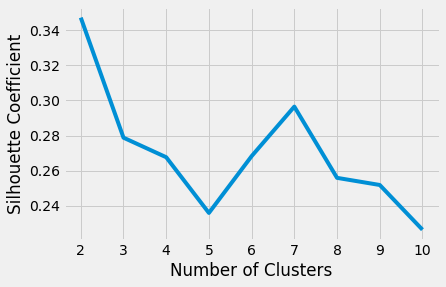

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=7, random_state=42)

kmeans_pred = kmeans.fit_predict(X)
kmeans_clusters = np.unique(kmeans_pred)

for cluster in kmeans_clusters:
  row_ix = np.where(kmeans_pred==cluster)
  print(row_ix)
  print(cluster, X.iloc[row_ix])
  # plt.scatter(row_ix,X.iloc[row_ix])
# plt.grid()
# plt.show()

(array([14, 21, 22]),)
0             0    1    2    3    4    5    6    7    8    9    10   11   12  \
1982-1983 -0.1  0.0  0.1  0.2  0.5  0.7  0.7  0.8  1.1  1.6  2.0  2.2  2.2   
1997-1998 -0.5 -0.5 -0.4 -0.1  0.3  0.8  1.2  1.6  1.9  2.1  2.3  2.4  2.4   
2015-2016  0.7  0.6  0.6  0.6  0.8  1.0  1.2  1.5  1.9  2.2  2.4  2.6  2.6   

            13   14   15   16   17  
1982-1983  2.2  1.9  1.5  1.3  1.1  
1997-1998  2.2  1.9  1.4  1.0  0.5  
2015-2016  2.5  2.1  1.6  0.9  0.4  
(array([ 9, 10, 11, 12, 23, 25]),)
1             0    1    2    3    4    5    6    7    8    9    10   11   12  \
1963-1964 -0.4 -0.4 -0.2  0.2  0.3  0.3  0.5  0.9  1.1  1.2  1.3  1.4  1.3   
1994-1995  0.1  0.1  0.2  0.3  0.4  0.4  0.4  0.4  0.6  0.7  1.0  1.1  1.0   
2002-2003 -0.3 -0.1  0.0  0.1  0.2  0.4  0.7  0.8  0.9  1.0  1.2  1.3  1.1   
2009-2010 -0.8 -0.7 -0.5 -0.2  0.1  0.4  0.5  0.5  0.7  1.0  1.3  1.6  1.5   
1968-1969 -0.7 -0.6 -0.4  0.0  0.3  0.6  0.5  0.4  0.5  0.7  1.0  1.1  1.1   
1953-1954

In [13]:
year=[0.0833, 0.1667, 0.25, 0.3333, 0.4167, 0.5, 0.5833, 0.6667, 0.75, 0.8333, 0.9167, 1, 1.0833, 1.1667, 1.25, 1.3333, 1.4167, 1.5]

len(year)

18

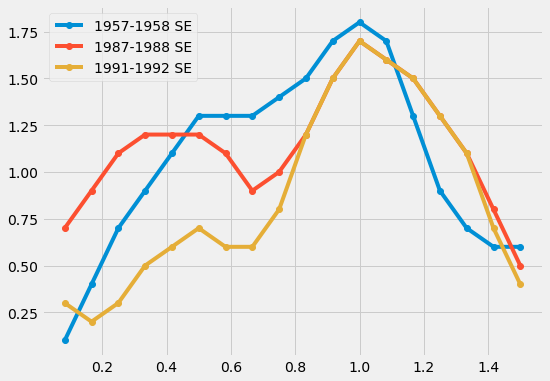

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(year,df['1957-1958'], 'o-', label='1957-1958 SE')
plt.plot(year,df['1987-1988'], 'o-', label='1987-1988 SE')
plt.plot(year,df['1991-1992'], 'o-', label='1991-1992 SE')
# plt.grid()
plt.legend()
plt.show();

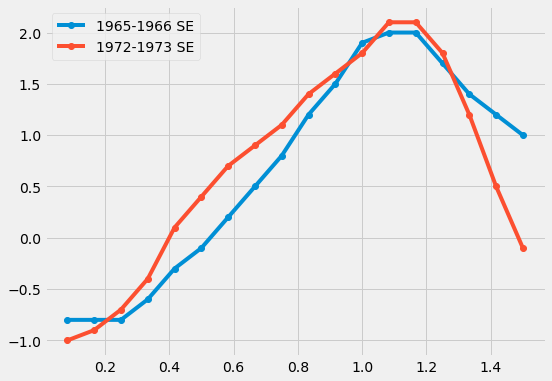

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(year,df['1965-1966'], 'o-', label='1965-1966 SE')
plt.plot(year,df['1972-1973'], 'o-', label='1972-1973 SE')
# plt.grid()
plt.legend()
plt.show();

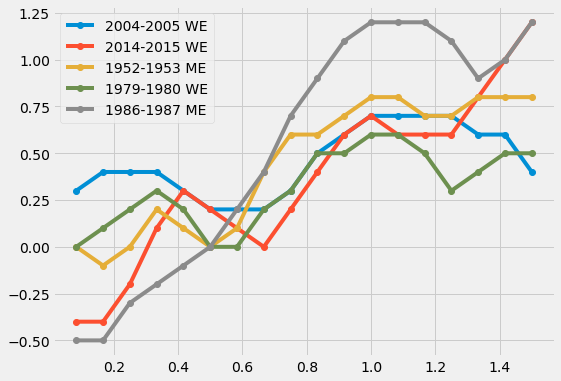

In [18]:
plt.figure(figsize=(8,6))
plt.plot(year,df['2004-2005'], 'o-', label='2004-2005 WE')
plt.plot(year,df['2014-2015'], 'o-', label='2014-2015 WE')
plt.plot(year,df['1952-1953'], 'o-', label='1952-1953 ME')
plt.plot(year,df['1979-1980'], 'o-', label='1979-1980 WE')
plt.plot(year,df['1986-1987'], 'o-', label='1986-1987 ME')
# plt.grid()
plt.legend()
plt.show();

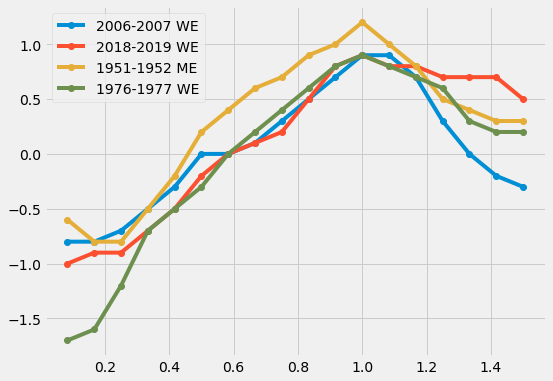

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(year,df['2006-2007'], 'o-', label='2006-2007 WE')
plt.plot(year,df['2018-2019'], 'o-', label='2018-2019 WE')
plt.plot(year,df['1951-1952'], 'o-', label='1951-1952 ME')
plt.plot(year,df['1976-1977'], 'o-', label='1976-1977 WE')
# plt.grid()
plt.legend()
plt.show();

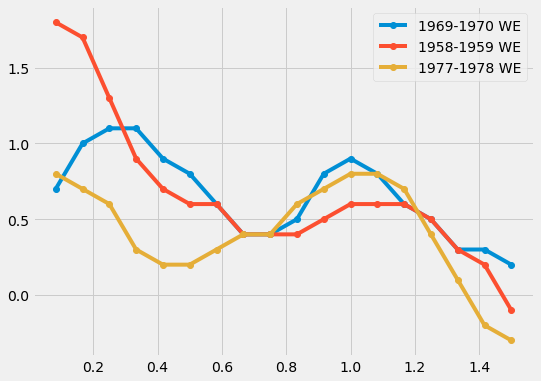

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(year,df['1969-1970'], 'o-', label='1969-1970 WE')
plt.plot(year,df['1958-1959'], 'o-', label='1958-1959 WE')
plt.plot(year,df['1977-1978'], 'o-', label='1977-1978 WE')
# plt.grid()
plt.legend()
plt.show();

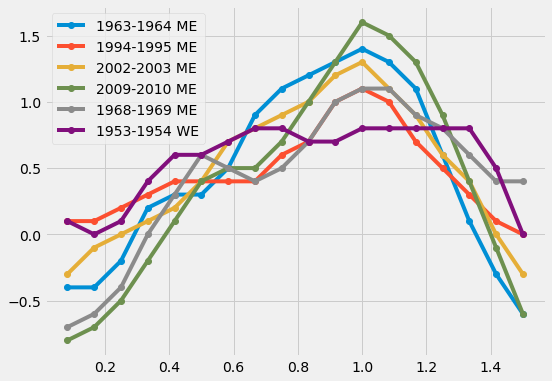

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(year,df['1963-1964'], 'o-', label='1963-1964 ME')
plt.plot(year,df['1994-1995'], 'o-', label='1994-1995 ME')
plt.plot(year,df['2002-2003'], 'o-', label='2002-2003 ME')
plt.plot(year,df['2009-2010'], 'o-', label='2009-2010 ME')
plt.plot(year,df['1968-1969'], 'o-', label='1968-1969 ME')
plt.plot(year,df['1953-1954'], 'o-', label='1953-1954 WE')
# plt.grid()
plt.legend()
plt.show();

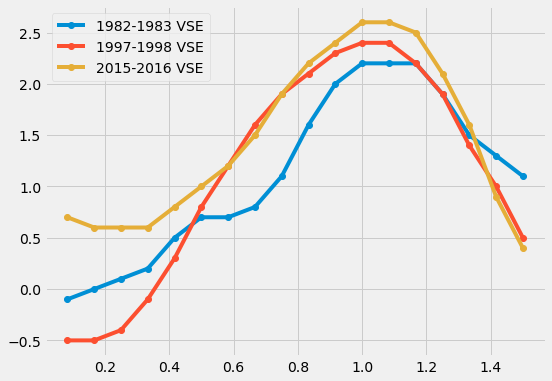

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(year,df['1982-1983'], 'o-', label='1982-1983 VSE')
plt.plot(year,df['1997-1998'], 'o-', label='1997-1998 VSE')
plt.plot(year,df['2015-2016'], 'o-', label='2015-2016 VSE')
# plt.grid()
plt.legend()
plt.show();

### Agglomerative Clustering

In [ ]:
silhouette_coefficients = []

for k in range (2,11):
  agg = AgglomerativeClustering(n_clusters=k)
  agg.fit(X)
  # print(agg.inertia_)
  score = silhouette_score(X, agg.labels_)
  silhouette_coefficients.append(score)

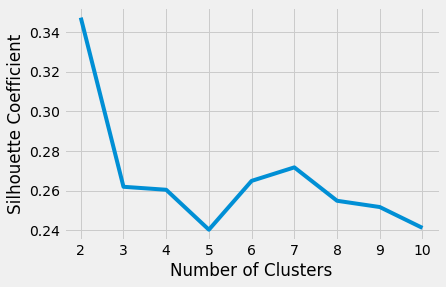

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
# plt.grid()
plt.show()

In [ ]:
agg_model = AgglomerativeClustering(n_clusters=7)

agg_pred = agg_model.fit_predict(X)
agg_clusters = np.unique(agg_pred)

for cluster in agg_clusters:
  row_ix = np.where(agg_pred==cluster)
  print(row_ix)
  print(cluster, X.iloc[row_ix])
#   plt.scatter(row_ix,X.iloc[row_ix])
# plt.grid()
# plt.show()

(array([ 8, 15, 16, 17, 18, 23]),)
0             0    1    2    3    4    5    6    7    8    9    10   11   12  \
2006-2007 -0.8 -0.8 -0.7 -0.5 -0.3  0.0  0.0  0.1  0.3  0.5  0.7  0.9  0.9   
2018-2019 -1.0 -0.9 -0.9 -0.7 -0.5 -0.2  0.0  0.1  0.2  0.5  0.8  0.9  0.8   
1951-1952 -0.6 -0.8 -0.8 -0.5 -0.2  0.2  0.4  0.6  0.7  0.9  1.0  1.2  1.0   
1976-1977 -1.7 -1.6 -1.2 -0.7 -0.5 -0.3  0.0  0.2  0.4  0.6  0.8  0.9  0.8   
1986-1987 -0.5 -0.5 -0.3 -0.2 -0.1  0.0  0.2  0.4  0.7  0.9  1.1  1.2  1.2   
1968-1969 -0.7 -0.6 -0.4  0.0  0.3  0.6  0.5  0.4  0.5  0.7  1.0  1.1  1.1   

            13   14   15   16   17  
2006-2007  0.7  0.3  0.0 -0.2 -0.3  
2018-2019  0.8  0.7  0.7  0.7  0.5  
1951-1952  0.8  0.5  0.4  0.3  0.3  
1976-1977  0.7  0.6  0.3  0.2  0.2  
1986-1987  1.2  1.1  0.9  1.0  1.2  
1968-1969  0.9  0.8  0.6  0.4  0.4  
(array([ 0,  1,  3,  4,  7, 10, 25]),)
1             0    1    2    3    4    5    6    7    8    9    10   11   12  \
1952-1953  0.0 -0.1  0.0  0.2  0.1  0.

In [ ]:
year=[0.0833, 0.1667, 0.25, 0.3333, 0.4167, 0.5, 0.5833, 0.6667, 0.75, 0.8333, 0.9167, 1, 1.0833, 1.1667, 1.25, 1.3333, 1.4167, 1.5]

len(year)

18

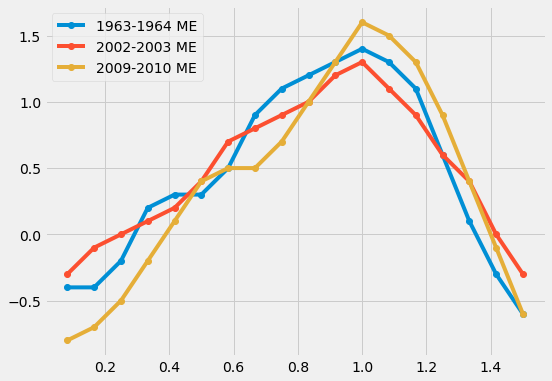

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(year,df['1963-1964'], 'o-', label='1963-1964 ME')
plt.plot(year,df['2002-2003'], 'o-', label='2002-2003 ME')
plt.plot(year,df['2009-2010'], 'o-', label='2009-2010 ME')
# plt.grid()
plt.legend()
plt.show();

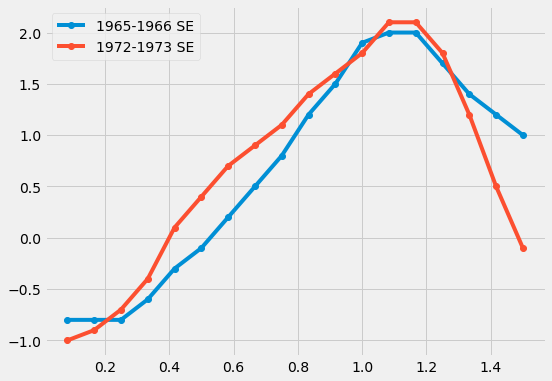

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(year,df['1965-1966'], 'o-', label='1965-1966 SE')
plt.plot(year,df['1972-1973'], 'o-', label='1972-1973 SE')
# plt.grid()
plt.legend()
plt.show();

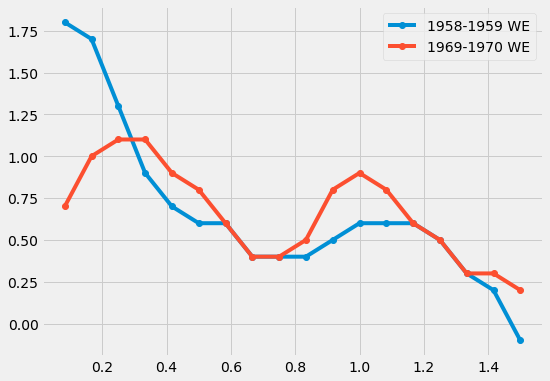

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(year,df['1958-1959'], 'o-', label='1958-1959 WE')
plt.plot(year,df['1969-1970'], 'o-', label='1969-1970 WE')
# plt.grid()
plt.legend()
plt.show();

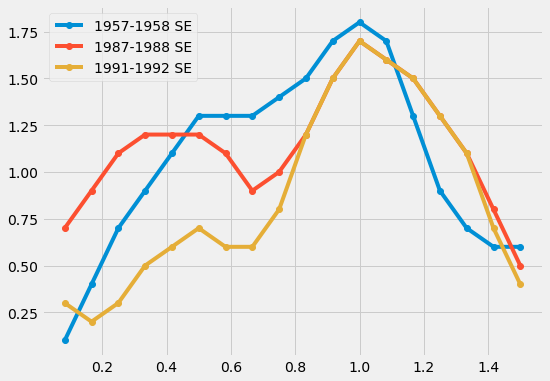

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(year,df['1957-1958'], 'o-', label='1957-1958 SE')
plt.plot(year,df['1987-1988'], 'o-', label='1987-1988 SE')
plt.plot(year,df['1991-1992'], 'o-', label='1991-1992 SE')
# plt.grid()
plt.legend()
plt.show();

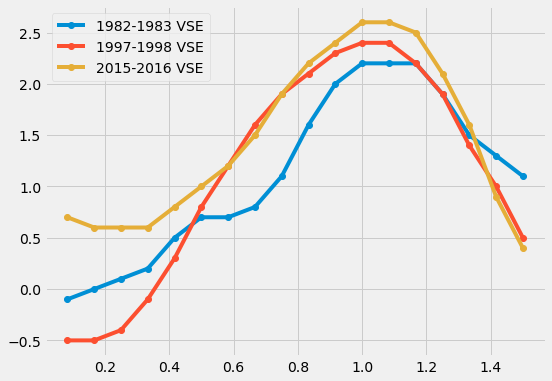

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(year,df['1982-1983'], 'o-', label='1982-1983 VSE')
plt.plot(year,df['1997-1998'], 'o-', label='1997-1998 VSE')
plt.plot(year,df['2015-2016'], 'o-', label='2015-2016 VSE')
# plt.grid()
plt.legend()
plt.show();

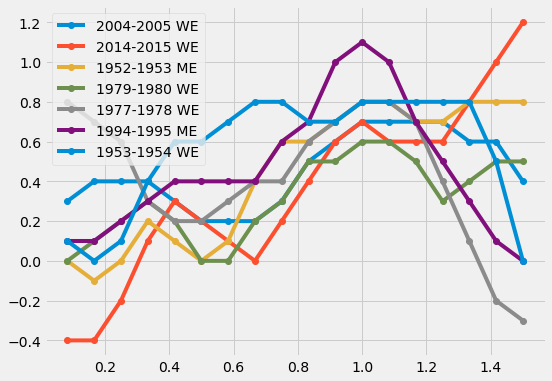

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(year,df['2004-2005'], 'o-', label='2004-2005 WE')
plt.plot(year,df['2014-2015'], 'o-', label='2014-2015 WE')
plt.plot(year,df['1952-1953'], 'o-', label='1952-1953 ME')
plt.plot(year,df['1979-1980'], 'o-', label='1979-1980 WE')
plt.plot(year,df['1977-1978'], 'o-', label='1977-1978 WE')
plt.plot(year,df['1994-1995'], 'o-', label='1994-1995 ME')
plt.plot(year,df['1953-1954'], 'o-', label='1953-1954 WE')
# plt.grid()
plt.legend()
plt.show();

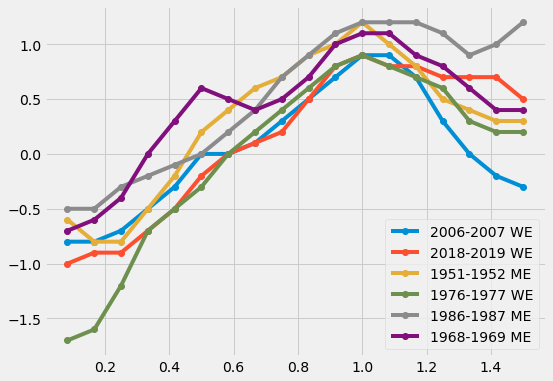

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(year,df['2006-2007'], 'o-', label='2006-2007 WE')
plt.plot(year,df['2018-2019'], 'o-', label='2018-2019 WE')
plt.plot(year,df['1951-1952'], 'o-', label='1951-1952 ME')
plt.plot(year,df['1976-1977'], 'o-', label='1976-1977 WE')
plt.plot(year,df['1986-1987'], 'o-', label='1986-1987 ME')
plt.plot(year,df['1968-1969'], 'o-', label='1968-1969 ME')
# plt.grid()
plt.legend()
plt.show();

## Remaining shapes

In [34]:
year=[0.0833, 0.1667, 0.25, 0.3333, 0.4167, 0.5, 0.5833, 0.6667, 0.75, 0.8333, 0.9167, 1, 1.0833, 1.1667, 1.25, 1.3333, 1.4167, 1.5]

len(year)

18

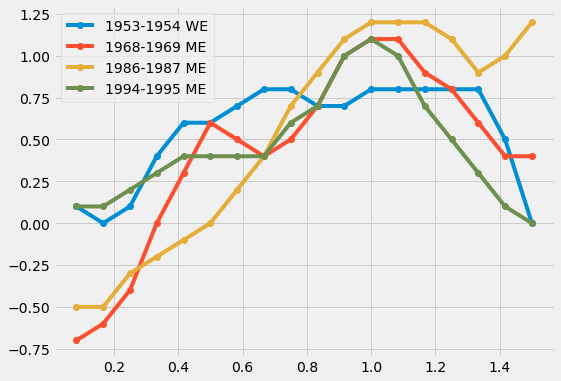

In [35]:
plt.style.use("fivethirtyeight")

plt.figure(figsize=(8,6))
plt.plot(year,df['1953-1954'], 'o-', label='1953-1954 WE')
plt.plot(year,df['1968-1969'], 'o-', label='1968-1969 ME')
# plt.plot(year,df['1977-1978'], 'o-', label='1977-1978 WE')
plt.plot(year,df['1986-1987'], 'o-', label='1986-1987 ME')
plt.plot(year,df['1994-1995'], 'o-', label='1994-1995 ME')
# plt.grid()
plt.legend()
plt.show();

In [36]:
rdf = pd.concat([df['1953-1954'],df['1968-1969'],df['1986-1987'],df['1994-1995']],axis=1)
# rdf

In [37]:
rX=rdf.T
rX

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
1953-1954,0.1,0.0,0.1,0.4,0.6,0.6,0.7,0.8,0.8,0.7,0.7,0.8,0.8,0.8,0.8,0.8,0.5,0.0
1968-1969,-0.7,-0.6,-0.4,0.0,0.3,0.6,0.5,0.4,0.5,0.7,1.0,1.1,1.1,0.9,0.8,0.6,0.4,0.4
1986-1987,-0.5,-0.5,-0.3,-0.2,-0.1,0.0,0.2,0.4,0.7,0.9,1.1,1.2,1.2,1.2,1.1,0.9,1.0,1.2
1994-1995,0.1,0.1,0.2,0.3,0.4,0.4,0.4,0.4,0.6,0.7,1.0,1.1,1.0,0.7,0.5,0.3,0.1,0.0


In [38]:
kmeans = KMeans(n_clusters=2, random_state=42)

kmeans_pred = kmeans.fit_predict(rX)
kmeans_clusters = np.unique(kmeans_pred)

for cluster in kmeans_clusters:
  row_ix = np.where(kmeans_pred==cluster)
  print(row_ix)
  print(cluster, rX.iloc[row_ix])
  # plt.scatter(row_ix,X.iloc[row_ix])
# plt.grid()
# plt.show()

(array([1, 2]),)
0             0    1    2    3    4    5    6    7    8    9    10   11   12  \
1968-1969 -0.7 -0.6 -0.4  0.0  0.3  0.6  0.5  0.4  0.5  0.7  1.0  1.1  1.1   
1986-1987 -0.5 -0.5 -0.3 -0.2 -0.1  0.0  0.2  0.4  0.7  0.9  1.1  1.2  1.2   

            13   14   15   16   17  
1968-1969  0.9  0.8  0.6  0.4  0.4  
1986-1987  1.2  1.1  0.9  1.0  1.2  
(array([0, 3]),)
1             0    1    2    3    4    5    6    7    8    9    10   11   12  \
1953-1954  0.1  0.0  0.1  0.4  0.6  0.6  0.7  0.8  0.8  0.7  0.7  0.8  0.8   
1994-1995  0.1  0.1  0.2  0.3  0.4  0.4  0.4  0.4  0.6  0.7  1.0  1.1  1.0   

            13   14   15   16   17  
1953-1954  0.8  0.8  0.8  0.5  0.0  
1994-1995  0.7  0.5  0.3  0.1  0.0  


In [39]:
agg_model = AgglomerativeClustering(n_clusters=2)

agg_pred = agg_model.fit_predict(rX)
agg_clusters = np.unique(agg_pred)

for cluster in agg_clusters:
  row_ix = np.where(agg_pred==cluster)
  print(row_ix)
  print(cluster, rX.iloc[row_ix])
#   plt.scatter(row_ix,X.iloc[row_ix])
# plt.grid()
# plt.show()

(array([1, 2]),)
0             0    1    2    3    4    5    6    7    8    9    10   11   12  \
1968-1969 -0.7 -0.6 -0.4  0.0  0.3  0.6  0.5  0.4  0.5  0.7  1.0  1.1  1.1   
1986-1987 -0.5 -0.5 -0.3 -0.2 -0.1  0.0  0.2  0.4  0.7  0.9  1.1  1.2  1.2   

            13   14   15   16   17  
1968-1969  0.9  0.8  0.6  0.4  0.4  
1986-1987  1.2  1.1  0.9  1.0  1.2  
(array([0, 3]),)
1             0    1    2    3    4    5    6    7    8    9    10   11   12  \
1953-1954  0.1  0.0  0.1  0.4  0.6  0.6  0.7  0.8  0.8  0.7  0.7  0.8  0.8   
1994-1995  0.1  0.1  0.2  0.3  0.4  0.4  0.4  0.4  0.6  0.7  1.0  1.1  1.0   

            13   14   15   16   17  
1953-1954  0.8  0.8  0.8  0.5  0.0  
1994-1995  0.7  0.5  0.3  0.1  0.0  


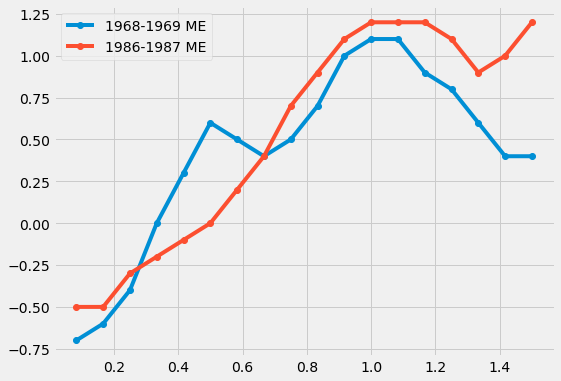

In [42]:
plt.figure(figsize=(8,6))
plt.plot(year,rdf['1968-1969'], 'o-', label='1968-1969 ME')
plt.plot(year,rdf['1986-1987'], 'o-', label='1986-1987 ME')
# plt.grid()
plt.legend()
plt.show();

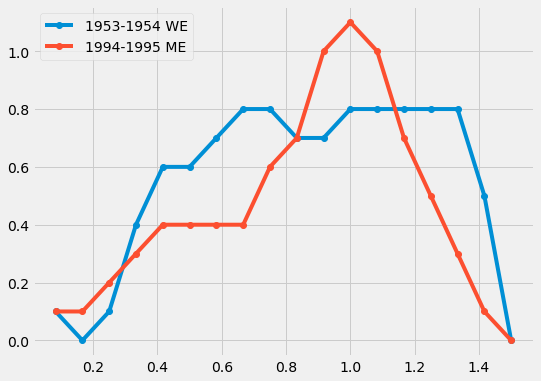

In [43]:
plt.figure(figsize=(8,6))
plt.plot(year,rdf['1953-1954'], 'o-', label='1953-1954 WE')
# plt.plot(year,df['1977-1978'], 'o-', label='1977-1978 WE')
plt.plot(year,rdf['1994-1995'], 'o-', label='1994-1995 ME')
# plt.grid()
plt.legend()
plt.show();

## Plots

In [47]:
year=[0.0833, 0.1667, 0.25, 0.3333, 0.4167, 0.5, 0.5833, 0.6667, 0.75, 0.8333, 0.9167, 1, 1.0833, 1.1667, 1.25, 1.3333, 1.4167, 1.5]

len(year)

18

### Group 1

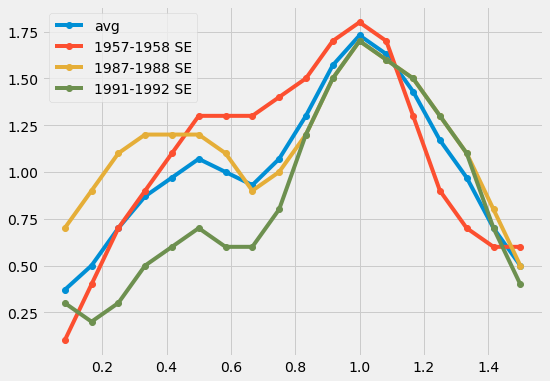

In [59]:
plt.figure(figsize=(8,6))
avg = np.round( (df['1957-1958']+df['1987-1988']+df['1991-1992'])/3, 2 )

plt.plot(year,avg, 'o-', label='avg')
plt.plot(year,df['1957-1958'], 'o-', label='1957-1958 SE')
plt.plot(year,df['1987-1988'], 'o-', label='1987-1988 SE')
plt.plot(year,df['1991-1992'], 'o-', label='1991-1992 SE')
# plt.grid()
plt.legend()
plt.show();

### Group 2

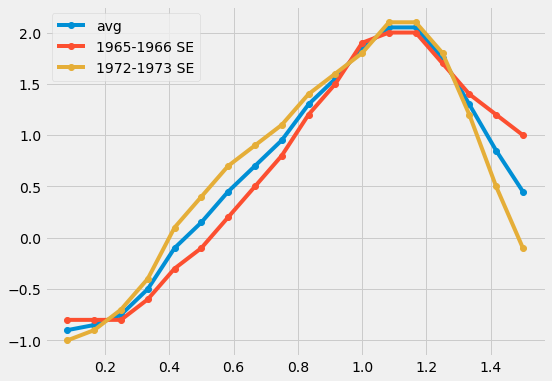

In [60]:
plt.figure(figsize=(8,6))
avg = np.round( (df['1965-1966']+df['1972-1973'])/2, 2 )

plt.plot(year,avg, 'o-', label='avg')
plt.plot(year,df['1965-1966'], 'o-', label='1965-1966 SE')
plt.plot(year,df['1972-1973'], 'o-', label='1972-1973 SE')
# plt.grid()
plt.legend()
plt.show();

### Group 3

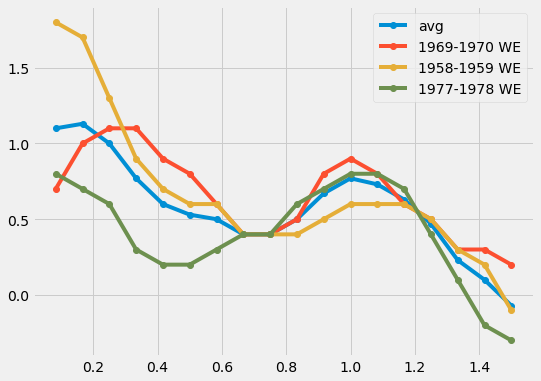

In [61]:
plt.figure(figsize=(8,6))
avg = np.round( (df['1969-1970']+df['1958-1959']+df['1977-1978'])/3, 2 )

plt.plot(year,avg, 'o-', label='avg')
plt.plot(year,df['1969-1970'], 'o-', label='1969-1970 WE')
plt.plot(year,df['1958-1959'], 'o-', label='1958-1959 WE')
plt.plot(year,df['1977-1978'], 'o-', label='1977-1978 WE')
# plt.grid()
plt.legend()
plt.show();

### Group 4

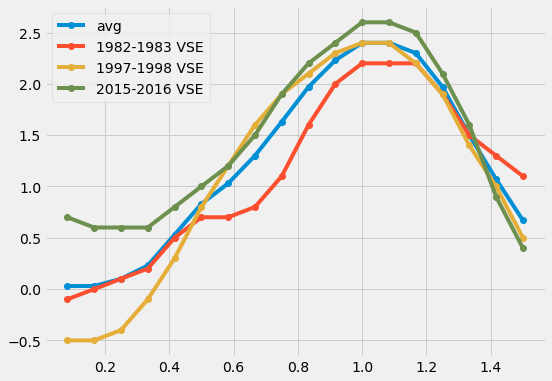

In [62]:
plt.figure(figsize=(8,6))
avg = np.round( (df['1982-1983']+df['1997-1998']+df['2015-2016'])/3, 2 )

plt.plot(year,avg, 'o-', label='avg')
plt.plot(year,df['1982-1983'], 'o-', label='1982-1983 VSE')
plt.plot(year,df['1997-1998'], 'o-', label='1997-1998 VSE')
plt.plot(year,df['2015-2016'], 'o-', label='2015-2016 VSE')
# plt.grid()
plt.legend()
plt.show();

### Group 5

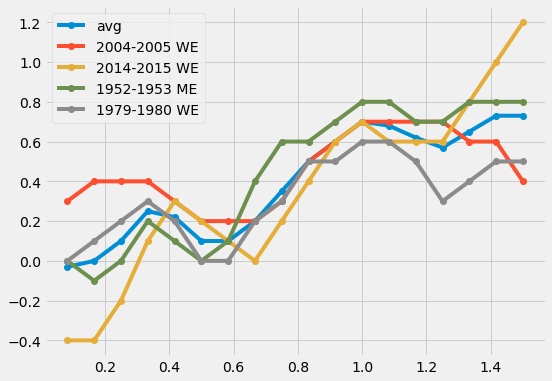

In [63]:
plt.figure(figsize=(8,6))
avg = np.round( (df['2004-2005']+df['2014-2015']+df['1952-1953']+df['1979-1980'])/4, 2 )

plt.plot(year,avg, 'o-', label='avg')
plt.plot(year,df['2004-2005'], 'o-', label='2004-2005 WE')
plt.plot(year,df['2014-2015'], 'o-', label='2014-2015 WE')
plt.plot(year,df['1952-1953'], 'o-', label='1952-1953 ME')
plt.plot(year,df['1979-1980'], 'o-', label='1979-1980 WE')
# plt.grid()
plt.legend()
plt.show();

### Group 6

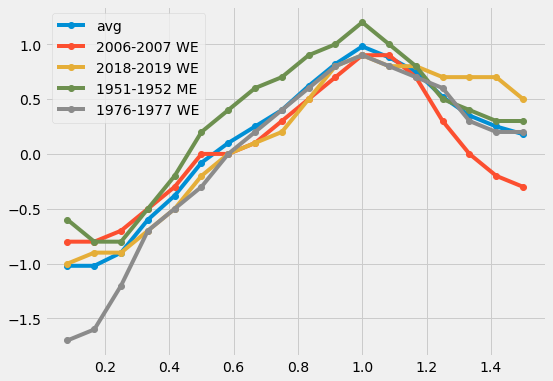

In [64]:
plt.figure(figsize=(8,6))
avg = np.round( (df['2006-2007']+df['2018-2019']+df['1951-1952']+df['1976-1977'])/4, 2 )

plt.plot(year,avg, 'o-', label='avg')
plt.plot(year,df['2006-2007'], 'o-', label='2006-2007 WE')
plt.plot(year,df['2018-2019'], 'o-', label='2018-2019 WE')
plt.plot(year,df['1951-1952'], 'o-', label='1951-1952 ME')
plt.plot(year,df['1976-1977'], 'o-', label='1976-1977 WE')
# plt.grid()
plt.legend()
plt.show();

### Group 7

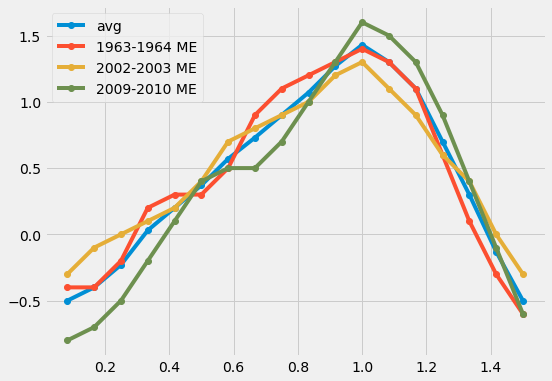

In [65]:
plt.figure(figsize=(8,6))
avg = np.round( (df['1963-1964']+df['2002-2003']+df['2009-2010'])/3, 2 )

plt.plot(year,avg, 'o-', label='avg')
plt.plot(year,df['1963-1964'], 'o-', label='1963-1964 ME')
plt.plot(year,df['2002-2003'], 'o-', label='2002-2003 ME')
plt.plot(year,df['2009-2010'], 'o-', label='2009-2010 ME')
# plt.grid()
plt.legend()
plt.show();

### Group 8

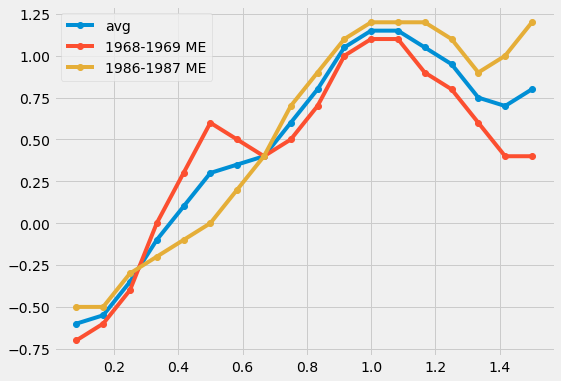

In [66]:
plt.figure(figsize=(8,6))
avg = np.round( (df['1968-1969']+df['1986-1987'])/2, 2 )

plt.plot(year,avg, 'o-', label='avg')
plt.plot(year,df['1968-1969'], 'o-', label='1968-1969 ME')
plt.plot(year,df['1986-1987'], 'o-', label='1986-1987 ME')
# plt.grid()
plt.legend()
plt.show();

### Group 9

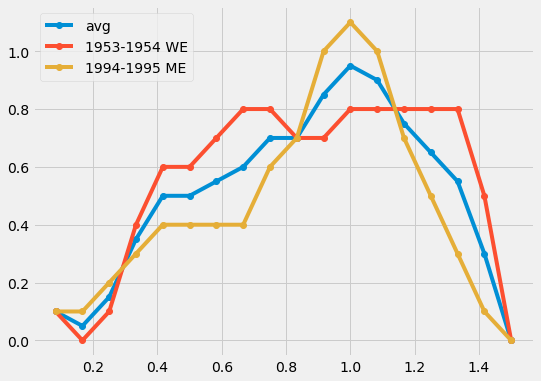

In [67]:
plt.figure(figsize=(8,6))
avg = np.round( (df['1953-1954']+df['1994-1995'])/2, 2 )

plt.plot(year,avg, 'o-', label='avg')
plt.plot(year,df['1953-1954'], 'o-', label='1953-1954 WE')
plt.plot(year,df['1994-1995'], 'o-', label='1994-1995 ME')
# plt.grid()
plt.legend()
plt.show();